##Build a model to recognize disease in Potato

**1.Load the data from gdrive to colab and unzip it**

**2.Become one with data(Data Preprocessing)**

**3.Build a VGG-16 model that we done before on Apple disease prediction tensorflow nn model**

**4.Train the model on the Potato image dataset and choose the better model**

**4.Evaluate and Visualize the predictions**

---


**Step1.**
Load the Potato plant disease data from google drive and unzip the file

---

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
from zipfile import ZipFile
zip_ref=ZipFile('/gdrive/MyDrive/Pota.zip')
zip_ref.extractall()
zip_ref.close()

**Step2.** Become one with data and preprocess the *Potato* image dataset

---

In [4]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

*Get the number of directories and images on the Pota folder*


In [5]:
for directory_path,directory_name,file_names in os.walk("Pota"):
  print(f"There are {len(directory_name)} directories and {len(file_names)} images are in :{directory_path}")

There are 3 directories and 1 images are in :Pota
There are 0 directories and 7 images are in :Pota/test
There are 3 directories and 0 images are in :Pota/train
There are 0 directories and 1939 images are in :Pota/train/Potato___Early_blight
There are 0 directories and 1939 images are in :Pota/train/Potato___Late_blight
There are 0 directories and 1824 images are in :Pota/train/Potato___healthy
There are 3 directories and 0 images are in :Pota/valid
There are 0 directories and 485 images are in :Pota/valid/Potato___Early_blight
There are 0 directories and 485 images are in :Pota/valid/Potato___Late_blight
There are 0 directories and 456 images are in :Pota/valid/Potato___healthy


Visualize some random images from selected folder


In [6]:
def visualize_image(path,disease):
  if(disease!='.DS_Store'):
    rand_img=np.random.choice(os.listdir(os.path.join(path,disease)))
    image=mpimg.imread(os.path.join(path,disease,rand_img))
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    print(image.shape)
    plt.gca().invert_yaxis()
    color="red"
    #Green text for healthy plant and red for diseased plant
    if(disease=="Potato___healthy"):color="green"
    plt.title(disease,fontsize=15,color=color)

(256, 256, 3)


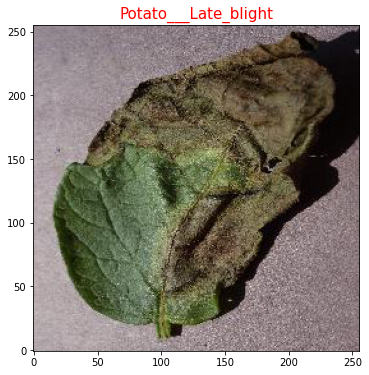

In [7]:
Random_image=np.random.choice(os.listdir("Pota/train/"))
visualize_image("Pota/train/",Random_image) 

**First train the VGG-16 architecture model with non-augmented data and check the performance**

In [8]:
#Normalize the data using ImageDataGeneator
traindata_gen=ImageDataGenerator(rescale=1/255.)
valdata_gen=ImageDataGenerator(rescale=1/255.)

In [9]:
''' 
Mapping our training and validation data to the ImageDataGenerator instance and using the function flow_from_directory
we define our taret_size,class_mode and batch_size
'''

traindata=traindata_gen.flow_from_directory("Pota/train",
                                            target_size=(256,256),
                                            class_mode="categorical",
                                            batch_size=32)
validdata=valdata_gen.flow_from_directory("Pota/valid",
                                         target_size=(256,256),
                                         class_mode="categorical",
                                         batch_size=32)

Found 5702 images belonging to 3 classes.
Found 1426 images belonging to 3 classes.


**Step3.**


Use VGG-16 architecture to build the model

In [10]:
'''The above VGG-16 model is a pretty complex model that can genaralize 1000 classes 
but we have only 4 classes(labels) on out Apple disease data
'''

model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")

])
history=model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [11]:
early_stop=EarlyStopping(monitor='val_loss',patience=3,verbose=1)


model2.fit(traindata, steps_per_epoch=len(traindata),epochs=20,
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
179/179 [==============================] - 29s 101ms/step - loss: 0.6739 - accuracy: 0.6764 - val_loss: 0.2585 - val_accuracy: 0.8829
Epoch 2/20
179/179 [==============================] - 19s 103ms/step - loss: 0.2363 - accuracy: 0.9062 - val_loss: 0.1303 - val_accuracy: 0.9565
Epoch 3/20
179/179 [==============================] - 19s 108ms/step - loss: 0.1476 - accuracy: 0.9463 - val_loss: 0.1682 - val_accuracy: 0.9404
Epoch 4/20
179/179 [==============================] - 17s 97ms/step - loss: 0.1360 - accuracy: 0.9511 - val_loss: 0.3567 - val_accuracy: 0.8661
Epoch 5/20
179/179 [==============================] - 17s 97ms/step - loss: 0.1289 - accuracy: 0.9544 - val_loss: 0.0321 - val_accuracy: 0.9909
Epoch 6/20
179/179 [==============================] - 17s 97ms/step - loss: 0.0268 - accuracy: 0.9905 - val_loss: 0.0230 - val_accuracy: 0.9930
Epoch 7/20
179/179 [==============================] - 18s 98ms/step - loss: 0.0898 - accuracy: 0.9698 - val_loss: 0.0414 - val_accura

In [12]:
def plot_loss_accuracy_curves(model):
  plt.figure()
  plt.plot(model.history.history['loss'],'r')
  plt.plot(model.history.history['val_loss'],'b')
  plt.title("loss curves",fontsize=14)
  # plt.axis(False);
  plt.figure()
  plt.plot(model.history.history['accuracy'],'r')
  plt.plot(model.history.history['val_accuracy'],'b')
  plt.title("accuracy",fontsize=14)

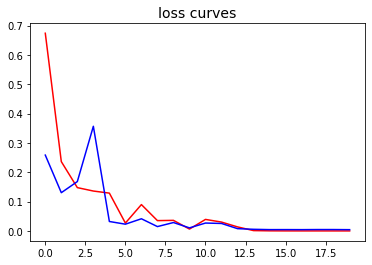

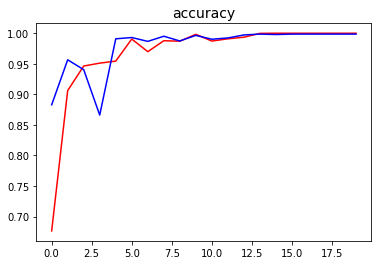

In [13]:
plot_loss_accuracy_curves(model2)

In [14]:
#Evaluate our model
model2.evaluate(validdata)

45/45 [==============================] - 3s 72ms/step - loss: 0.0043 - accuracy: 0.9986


[0.004274414852261543, 0.9985975027084351]

**Observation:**
Model2 performs well with non-augmented data.Let's try it on augmented data and check the performance

Step4. Create a model and name it model3 which'll be trained using augmented training data



In [15]:
traindata_aug_gen=ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True
                                     )

In [16]:
train_aug_data=traindata_aug_gen.flow_from_directory('Pota/train',
                                                     target_size=(256,256),
                                                     class_mode="categorical",
                                                     batch_size=32)

Found 5702 images belonging to 3 classes.


In [17]:
model3=tf.keras.models.clone_model(model2)
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(train_aug_data,epochs=20,steps_per_epoch=len(train_aug_data),
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
179/179 [==============================] - 83s 460ms/step - loss: 1.0297 - accuracy: 0.4174 - val_loss: 0.8567 - val_accuracy: 0.6753
Epoch 2/20
179/179 [==============================] - 81s 452ms/step - loss: 0.6744 - accuracy: 0.7013 - val_loss: 1.2837 - val_accuracy: 0.5470
Epoch 3/20
179/179 [==============================] - 82s 457ms/step - loss: 0.5009 - accuracy: 0.7824 - val_loss: 0.5758 - val_accuracy: 0.7279
Epoch 4/20
179/179 [==============================] - 81s 452ms/step - loss: 0.4225 - accuracy: 0.8183 - val_loss: 0.4125 - val_accuracy: 0.8156
Epoch 5/20
179/179 [==============================] - 81s 450ms/step - loss: 0.4158 - accuracy: 0.8295 - val_loss: 0.4739 - val_accuracy: 0.7742
Epoch 6/20
179/179 [==============================] - 82s 458ms/step - loss: 0.3382 - accuracy: 0.8664 - val_loss: 0.3345 - val_accuracy: 0.8429
Epoch 7/20
179/179 [==============================] - 81s 451ms/step - loss: 0.2644 - accuracy: 0.8992 - val_loss: 0.7120 - val_ac

In [18]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                    

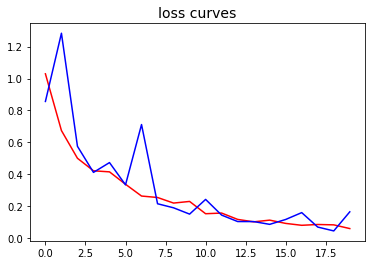

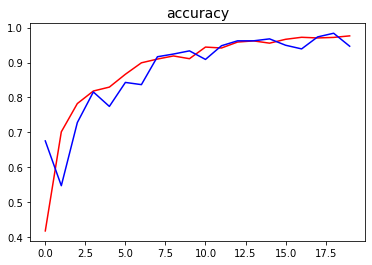

In [19]:
plot_loss_accuracy_curves(model3)

Evaluation of validation data on `model3`

In [20]:
model3.evaluate(validdata)

45/45 [==============================] - 3s 73ms/step - loss: 0.1655 - accuracy: 0.9467


[0.16553190350532532, 0.946704089641571]

Evaluation of validation data on `model2`

In [21]:
model2.evaluate(validdata)

45/45 [==============================] - 3s 72ms/step - loss: 0.0043 - accuracy: 0.9986


[0.004274415317922831, 0.9985975027084351]

In [22]:
model2.save("model2_Pota.h5")
model3.save("model3_Pota.h5")

**Observation:**

As per the above observation `model3` and `model2` both  performs well on validation data.

where `model3` gave an accuracy: 94.67%

where `model2` gave an accuracy: 99.9%

Save the models and copy it to gdrive

In [23]:
shutil.copy("model2_Pota.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model2_Pota.h5'

In [24]:
shutil.copy("model3_Pota.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model3_Pota.h5'

In [25]:
def load_and_prep_data(path):
  img=tf.io.read_file(path)
  #decode the image into tensor
  tensor=tf.io.decode_image(img,channels=3)

  image=tf.image.resize(tensor,[256,256])
  #normalize the image
  image=image/255.

  #we need to expand the first axis beacuse of batch size
  image=tf.expand_dims(image,axis=0)
  #(1,256,256,3) 

  return image

In [26]:
class_keys=list(traindata.class_indices.keys())

In [27]:
# def visualize_random_class(model):
#   plt.figure(figsize=(6,5))
#   class_name=np.random.choice(os.listdir("Pota/valid"))
#   image_name=np.random.choice(os.listdir(os.path.join("Corn/valid",class_name)))
#   img=load_and_prep_data(os.path.join("Pota/valid",class_name,image_name))
#   pred=model.predict(img)
#   plt.imshow(tf.squeeze(img))
#   index=tf.argmax(pred[0])
#   confidence=pred[0][index]
#   color="red"
#   if(class_name == class_keys[index]):color="green"
#   plt.title(class_keys[index]+f"\n\n Confidence: {confidence*100:.2f}%",color=color,fontsize=13)



In [28]:
def predict_and_visualize(model):
  plt.figure(figsize=(12,16))
  for i,j in enumerate(os.listdir("/content/Pota/test")):
    plt.subplot(3,3,i+1)

    # call the preprocessing function load_and_prep_data() method to preprocess the image into tensors
    pro_image=load_and_prep_data(os.path.join("/content/Pota/test",j))
  
    #predict using given model
    pred=model.predict(pro_image)

    #get the index of the max probability that is returned from softmax activation function
    index=tf.argmax(pred[0])

    #calculate the confidence
    confidence=pred[0][index]*100

    #plot the image with title
    plt.imshow(tf.squeeze(pro_image))
    plt.title(class_keys[index]+f"\n\n Confidence:{confidence:.2f}%",fontsize=13)
    plt.xlabel("True class: "+j,fontsize=12)

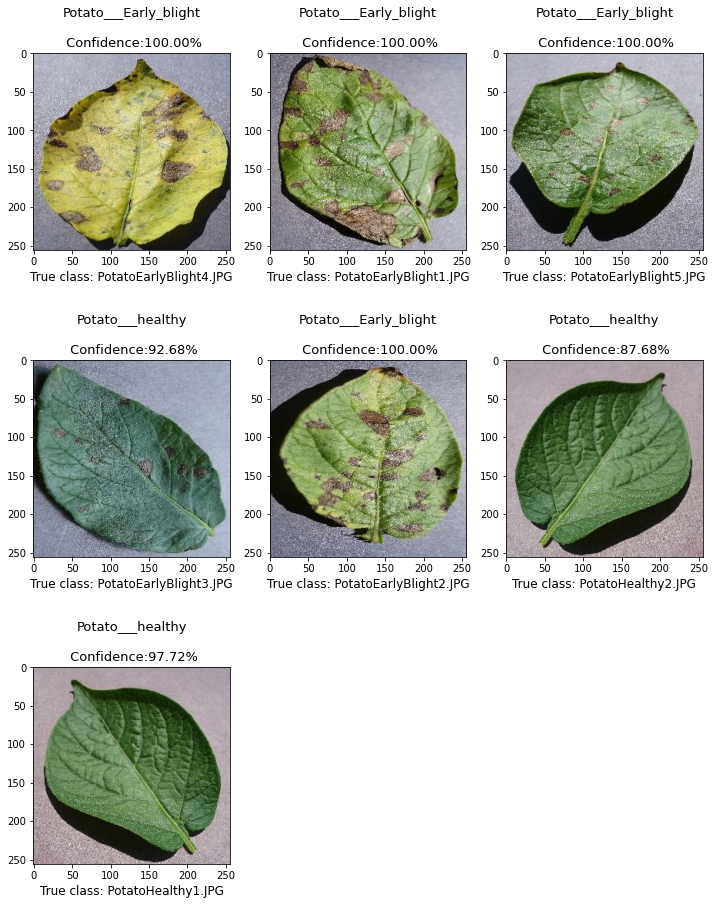

In [30]:
predict_and_visualize(model3
        )